In [3]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [65]:
#papyrus
pyplot.rcParams['font.size']=20
pyplot.rcParams['font.family']='sans'

In [73]:
g = 9.81 
vt = 4.9
CD = 1.0/5.0  
CL = 1.
v0 = 6.5
theta0 = -0.1 
x0 = 0.0
y0 = 2.0

In [83]:
g=9.81
vt=4.9
CD=1.0/5.0
CL=1.0
v0=6.5
theta0=-0.1
x0=0.0
y0=2.0
def rhs_phugoid(u,CL,CD,g,vt):
    v,theta,x,y=u
    result=numpy.array([-g*math.sin(theta)-CD/CL*g/vt**2*v**2,-g*math.cos(theta)/v+g/vt**2*v,
                v*math.cos(theta),v*math.sin(theta)])
    return result
def euler_step(u,f,dt,*args):
    u_new=u+dt*f(u,*args)
    return u_new
def l1_diff(u_coarse,u_fine,dt):
    N_coarse=u_coarse.shape[0]
    N_fine=u_coarse.shape[0]
    ratio=math.ceil(N_fine/N_coarse)
    diff=dt*numpy.sum(numpy.abs(u_coarse-u_fine[::ratio]))
    return diff
def rk2_step(u,f,dt,*args):
    u_star=u+dt*f(u,*args)
    u_new=u+dt*f(u_star,*args)
    return u_new

In [84]:
dt=0.01
T=20
N=int(T/dt)+1
u_euler=numpy.empty((N,4))
u_euler[0]=numpy.array([v0,theta0,x0,y0])
u_rk2=numpy.empty((N,4))
u_rk2[0]=numpy.array([v0,theta0,x0,y0])

for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n],rhs_phugoid,dt,CL,CD,g,vt)
    u_rk2[n + 1] = rk2_step(u_rk2[n],rhs_phugoid, dt,CL,CD,g,vt)

In [85]:
x_euler=u_euler[:,2]
y_euler=u_euler[:,3]
x_rk2=u_rk2[:,2]
y_rk2=u_rk2[:,3]

In [86]:
idx_negative_euler=numpy.where(y_euler<=0.0)[0]
if len(idx_negative_euler)==0:
    idx_ground_euler=N-1
    print('[Euler]Glider has not touched ground yet')
else:
    idx_ground_euler=idx_negative_euler[0]
idx_negative_rk2=numpy.where(y_rk2<=0.0)[0]
if len(idx_negative_rk2)==0:
    idx_ground_rk2=N-1
    print('[RK2]GLider has not touched ground yet!')
else:
    idx_ground_rk2=idx_negative_rk2[0]

In [87]:
print('Are the x-values close?{}'.format(numpy.allclose(x_euler,x_rk2)))
print('Are the y-values close?{}'.format(numpy.allclose(y_euler,y_rk2)))

Are the x-values close?False
Are the y-values close?False


Distance traveled:14.434


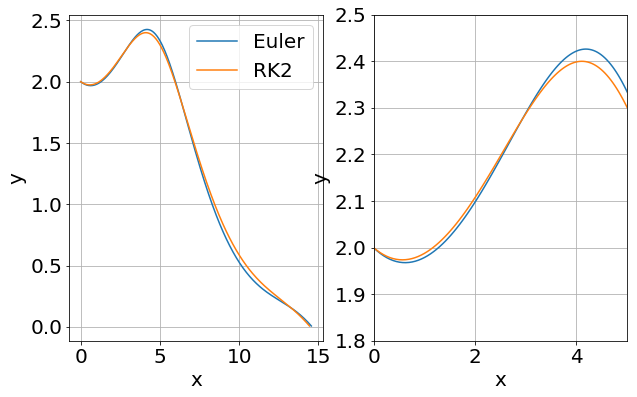

In [88]:
print('Distance traveled:{:.3f}'.format(x_rk2[idx_ground_rk2 - 1]))
pyplot.figure(figsize=(10.0, 6.0))
pyplot.subplot(121)
pyplot.grid()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x_euler[:idx_ground_euler], y_euler[:idx_ground_euler],
            label='Euler')
pyplot.plot(x_rk2[:idx_ground_rk2], y_rk2[:idx_ground_rk2],
            label='RK2')
pyplot.legend();
pyplot.subplot(122)
pyplot.grid()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x_euler, y_euler, label='Euler')
pyplot.plot(x_rk2, y_rk2, label='RK2')
pyplot.xlim(0.0, 5.0)
pyplot.ylim(1.8, 2.5);


In [91]:
dt_values=[0.1,0.05,0.01,0.005,0.001]
u_values = []
for dt in dt_values:
    N=int(T/dt)+1
    u=numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    for n in range(N-2):
        u[n+1]=rk2_step(u[n],rhs_phugoid,dt,CL,CD,g,vt)
    u_values.append(u)

In [93]:
diff_values = []
for u, dt in zip(u_values, dt_values):
    diff = l1_diff(u[:, 2], u_values[-1][:, 2], dt)
    diff_values.append(diff)

ValueError: operands could not be broadcast together with shapes (201,) (20001,) 

(3, 4)
